<a href="https://colab.research.google.com/github/Haeune-Jeon/CV/blob/main/3_HuggingFace%EC%82%AC%EC%A0%84%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers torchvision

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


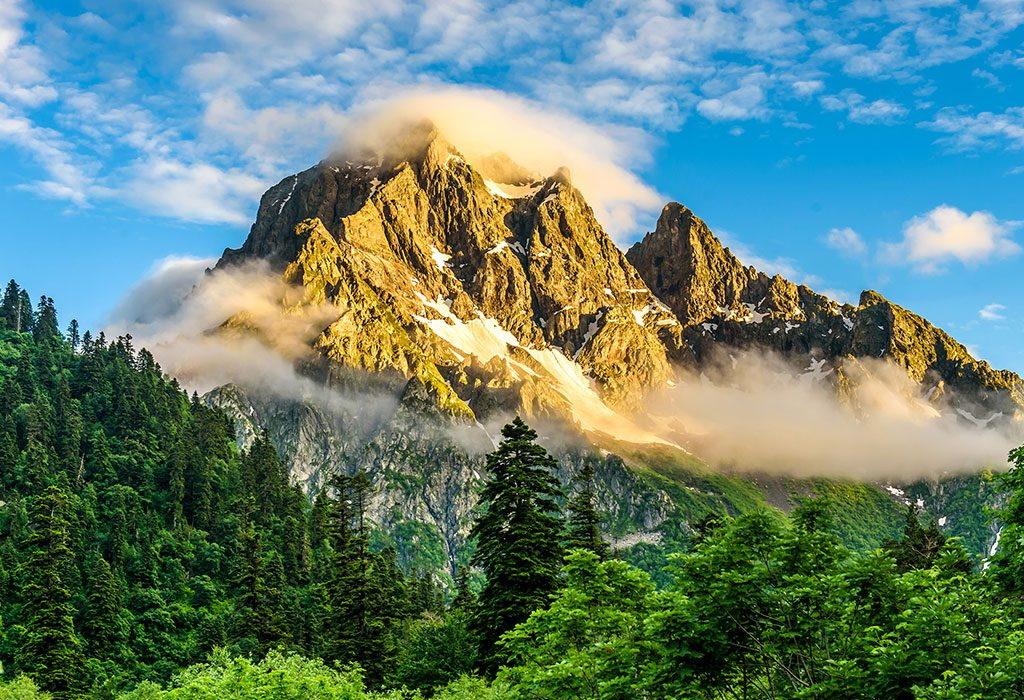

In [ ]:
# 이미지 출력
from IPython.display import Image as _Imgdis
from IPython.display import display
from PIL import ImageChops

path = '/content/drive/MyDrive/pytest_img/opencv/mountain.jpg'
display(_Imgdis(filename=path, width=600, height=400))

In [ ]:
# 이미지 분류
from transformers import pipeline
from keras.preprocessing.image import array_to_img, img_to_array, load_img

img = load_img(path)  # 이미지 로딩

classifier = pipeline("image-classification")  # 이미지 분류 파이프라인 생성
results = classifier(path)  # 이미지 분류 실행

print(results)  # 결과 출력

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 5dca96d (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


[{'label': 'alp', 'score': 0.8829386234283447}, {'label': 'valley, vale', 'score': 0.06690125167369843}, {'label': 'mountain tent', 'score': 0.016708197072148323}, {'label': 'lakeside, lakeshore', 'score': 0.005616496782749891}, {'label': 'recreational vehicle, RV, R.V.', 'score': 0.004478459246456623}]


In [ ]:
# 결과 정리
import pandas as pd

# 결과를 DataFrame으로 변환
results_df = pd.DataFrame(results)

print(results_df)

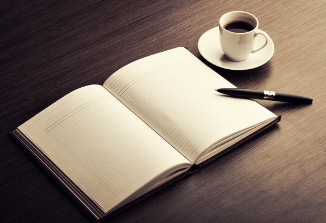

In [ ]:
# 여러 객체 이미지 출력
path = '/content/drive/MyDrive/pytest_img/opencv/pen_coffee.png'
display(_Imgdis(filename=path, width=600, height=400))

In [ ]:
# 이미지 분류
image = load_img(path)

classifier = pipeline("image-classification")
results = classifier(path)

print(results)

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 5dca96d (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.
Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


[{'label': 'cup', 'score': 0.23439285159111023}, {'label': 'espresso', 'score': 0.23302924633026123}, {'label': 'letter opener, paper knife, paperknife', 'score': 0.10450933873653412}, {'label': 'quill, quill pen', 'score': 0.0782238095998764}, {'label': 'coffee mug', 'score': 0.07125897705554962}]


In [ ]:
# 결과 정리
import pandas as pd

# 결과를 DataFrame으로 변환
results_df = pd.DataFrame(results)

print(results_df)

                                    label     score
0                                     cup  0.234393
1                                espresso  0.233029
2  letter opener, paper knife, paperknife  0.104509
3                        quill, quill pen  0.078224
4                              coffee mug  0.071259


In [ ]:
# 모델 변경
from transformers import pipeline
from keras.preprocessing.image import array_to_img, img_to_array, load_img

img = load_img(path)

classifier = pipeline(model="julien-c/hotdog-not-hotdog")
results = classifier(path)

print(results)

config.json:   0%|          | 0.00/621 [00:00<?, ?B/s]

Invalid model-index. Not loading eval results into CardData.


pytorch_model.bin:   0%|          | 0.00/343M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

[{'label': 'hot dog', 'score': 0.5393959283828735}, {'label': 'not hot dog', 'score': 0.4606040418148041}]


In [ ]:
# 결과 정리
import pandas as pd

results_df = pd.DataFrame(results)

print(results_df)

         label     score
0      hot dog  0.539396
1  not hot dog  0.460604


In [ ]:
# 모델 변경
from transformers import BeitImageProcessor, BeitForImageClassification
from PIL import Image
import requests

processor = BeitImageProcessor.from_pretrained("microsoft/beit-base-patch16-224-pt22k-ft22k")
model = BeitForImageClassification.from_pretrained("microsoft/beit-base-patch16-224-pt22k-ft22k")

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)


preprocessor_config.json:   0%|          | 0.00/276 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/utils/deprecation.py:165: UserWarning: The following named arguments are not valid for `BeitImageProcessor.__init__` and were ignored: 'feature_extractor_type'
  return func(*args, **kwargs)


config.json:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/414M [00:00<?, ?B/s]

In [ ]:
# 분류 결과
logits = outputs.logits
print(logits)
print(len(logits[0]))

predicted_class_idx = logits.argmax(-1).item()
print(predicted_class_idx)
print(logits[0][predicted_class_idx])
print("Predicted class:", model.config.id2label[predicted_class_idx])

tensor([[-0.3886,  2.1723,  0.8201,  ...,  0.8078,  2.0538, -1.7820]],
       grad_fn=<AddmmBackward0>)
21841
4928
tensor(12.0908, grad_fn=<SelectBackward0>)
Predicted class: book


## 이미지 교체(mountain.jpg)

In [ ]:
# 이미지 교체
path = '/content/drive/MyDrive/pytest_img/opencv/mountain.jpg'
image = load_img(path)

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits

predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

Predicted class: monocline


In [ ]:
# 복수 판정
import torch
values, indices = torch.topk(logits, 5, dim=1)

for i in range(5):
  predicted_class_idx = indices[0][i].item()
  print(f"Predicted class {i+1}:{model.config.id2label[predicted_class_idx]}, Score:{values[0][i].item()}")
print(values)
print(indices)

Predicted class 1:monocline, Score:10.628681182861328
Predicted class 2:reef, Score:10.305839538574219
Predicted class 3:rainbow, Score:9.3513822555542
Predicted class 4:alluvial_flat, alluvial_plain, Score:9.17534065246582
Predicted class 5:sky, Score:8.692063331604004
tensor([[10.6287, 10.3058,  9.3514,  9.1753,  8.6921]],
       grad_fn=<TopkBackward0>)
tensor([[14342, 14377, 14373, 14218, 14404]])


In [ ]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 24.9 MB/s eta 0:00:00


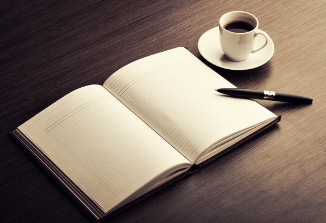

In [ ]:
# 이미지 출력
from IPython.display import Image as _Imgdis
from IPython.display import display
from PIL import Image

path = '/content/drive/MyDrive/pytest_img/opencv/pen_coffee.png'
display(_Imgdis(filename=path, width=600, height=400))

In [ ]:
# 객체 감지
from transformers import pipeline
from keras.preprocessing.image import array_to_img, img_to_array, load_img

image = load_img(path)

detector = pipeline("object-detection")
results = detector(image)

print(results)

No model was supplied, defaulted to facebook/detr-resnet-50 and revision 2729413 (https://huggingface.co/facebook/detr-resnet-50).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a 

[{'score': 0.9935367703437805, 'label': 'knife', 'box': {'xmin': 216, 'ymin': 88, 'xmax': 314, 'ymax': 105}}, {'score': 0.9983748197555542, 'label': 'cup', 'box': {'xmin': 218, 'ymin': 9, 'xmax': 270, 'ymax': 62}}, {'score': 0.8251277804374695, 'label': 'dining table', 'box': {'xmin': 0, 'ymin': 0, 'xmax': 325, 'ymax': 222}}, {'score': 0.9977249503135681, 'label': 'book', 'box': {'xmin': 9, 'ymin': 45, 'xmax': 281, 'ymax': 222}}]


In [ ]:
import pandas as pd

results_df = pd.DataFrame(results)

print(results_df)

      score         label                                                box
0  0.993537         knife  {'xmin': 216, 'ymin': 88, 'xmax': 314, 'ymax':...
1  0.998375           cup  {'xmin': 218, 'ymin': 9, 'xmax': 270, 'ymax': 62}
2  0.825128  dining table   {'xmin': 0, 'ymin': 0, 'xmax': 325, 'ymax': 222}
3  0.997725          book  {'xmin': 9, 'ymin': 45, 'xmax': 281, 'ymax': 222}


In [ ]:
from transformers import pipeline
from keras.preprocessing.image import array_to_img, img_to_array, load_img

image = load_img(path)

segmer = pipeline("image-segmentation")
results = segmer(image)

print(results)

No model was supplied, defaulted to facebook/detr-resnet-50-panoptic and revision fc15262 (https://huggingface.co/facebook/detr-resnet-50-panoptic).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/11.6k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/172M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/detr-resnet-50-panoptic were not used when initializing DetrForSegmentation: ['detr.model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForSegmentation from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForSegmentation from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


preprocessor_config.json:   0%|          | 0.00/289 [00:00<?, ?B/s]

`label_ids_to_fuse` unset. No instance will be fused.


[{'score': 0.988335, 'label': 'knife', 'mask': <PIL.Image.Image image mode=L size=326x223 at 0x78AD2DAFD810>}, {'score': 0.99682, 'label': 'LABEL_189', 'mask': <PIL.Image.Image image mode=L size=326x223 at 0x78AD2DAFD420>}, {'score': 0.999282, 'label': 'cup', 'mask': <PIL.Image.Image image mode=L size=326x223 at 0x78AD2DAFD9F0>}]


In [ ]:
# 결과 정리
import pandas as pd

results_df = pd.DataFrame(results)
print(results_df)

print(results_df.iloc[0][0])
print(results_df.iloc[0][1])
print(results_df.iloc[0][2])


      score      label                                               mask
0  0.988335      knife  <PIL.Image.Image image mode=L size=326x223 at ...
1  0.996820  LABEL_189  <PIL.Image.Image image mode=L size=326x223 at ...
2  0.999282        cup  <PIL.Image.Image image mode=L size=326x223 at ...
0.988335
knife
<PIL.Image.Image image mode=L size=326x223 at 0x78AD2DAFD810>


<ipython-input-16-a83bdd15d394>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(results_df.iloc[0][0])
<ipython-input-16-a83bdd15d394>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(results_df.iloc[0][1])
<ipython-input-16-a83bdd15d394>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(results_df.iloc[0][2])


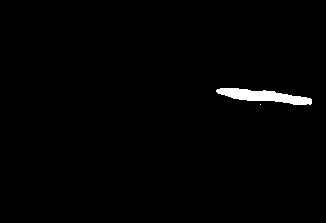

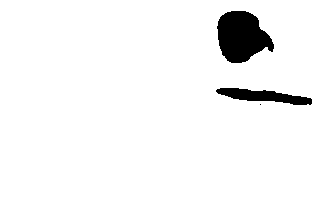

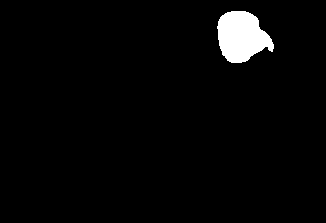

In [ ]:
# 객체 출력
display(results[0]['mask'])
display(results[1]['mask'])
display(results[2]['mask'])

## 이미지 예측

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install transformers

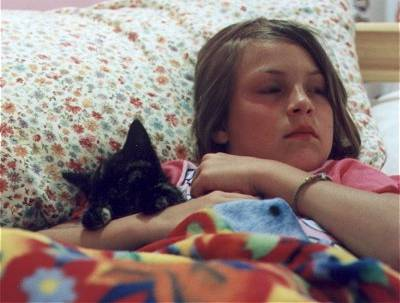

In [ ]:
from PIL import ImageChops
file = '/content/drive/MyDrive/pytest_img/cats_dogs/cat.6.jpg'
image = Image.open(file)
image

In [ ]:
from transformers import CLIPProcessor, CLIPModel

processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

In [ ]:
candidates = ['a cat is eating a meal', 'a photo of a cat', 'a cat is lyign with woman', 'a cat is lying with woman on the bed']

inputs = processor(text=candidates, images=image, return_tensors="pt", padding=True)

In [ ]:
model.eval()
outputs = model(**inputs)
outputs.keys()

odict_keys(['logits_per_image', 'logits_per_text', 'text_embeds', 'image_embeds', 'text_model_output', 'vision_model_output'])

In [ ]:
logits_per_image = outputs.logits_per_image
print(logits_per_image)

tensor([[19.7183, 24.0501, 26.5814, 28.7516]], grad_fn=<TBackward0>)


In [ ]:
import torch

probs = logits_per_image.softmax(dim=1)  # 두 번째 차원에서 Softmax 연산
print(candidates[torch.argmax(probs).item()])  # 가장 큰 확률의 인덱스 추출mport torch

a cat is lying with woman on the bed
